# Giriş

In [1]:
import tensorflow as tf

from tensorflow.keras.layers import Conv2D, Dense, Flatten, \
                                    Concatenate, GlobalMaxPooling2D, \
                                    MaxPooling2D, GlobalAveragePooling2D, \
                                    AveragePooling2D

import matplotlib.pyplot as plt

tf.__version__

'2.9.2'

## Datasetin Yüklenmesi

In [2]:
train_dir = "/content/train"
valid_dir = "/content/valid"
test_dir = "/content/test"

In [3]:
image_size = (224, 224)
batch_size = 128

train_ds = tf.keras.utils.image_dataset_from_directory(
    directory = train_dir,
    image_size = image_size,
    batch_size = batch_size,
    label_mode='int',
    shuffle = True
)

valid_ds = tf.keras.utils.image_dataset_from_directory(
    directory = valid_dir,
    image_size = image_size,
    batch_size = batch_size,
    label_mode='int', # 0 1 2 3 4 ... 
    shuffle = False
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    directory = test_dir,
    image_size = image_size,
    batch_size = batch_size,
    label_mode='int',
    shuffle = False
)

classes = train_ds.class_names

Found 70626 files belonging to 450 classes.
Found 2250 files belonging to 450 classes.
Found 2250 files belonging to 450 classes.


In [4]:
train_ds = train_ds.cache().prefetch(tf.data.AUTOTUNE)
# GPU t batchinde eğitim yapıyor. Forward pass - backward pass
# CPU t+1 batchini hazırlıyor.

In [5]:
def visualize_dataset(dataset: tf.data.Dataset):
    plt.figure(figsize=(24,18))
    for images, labels in dataset.take(1):
        for i in range(64):
            plt.subplot(8, 8, i+1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(classes[labels[i].numpy()])
            plt.axis('off')    

In [6]:
total_classes = len(classes)
total_classes

450

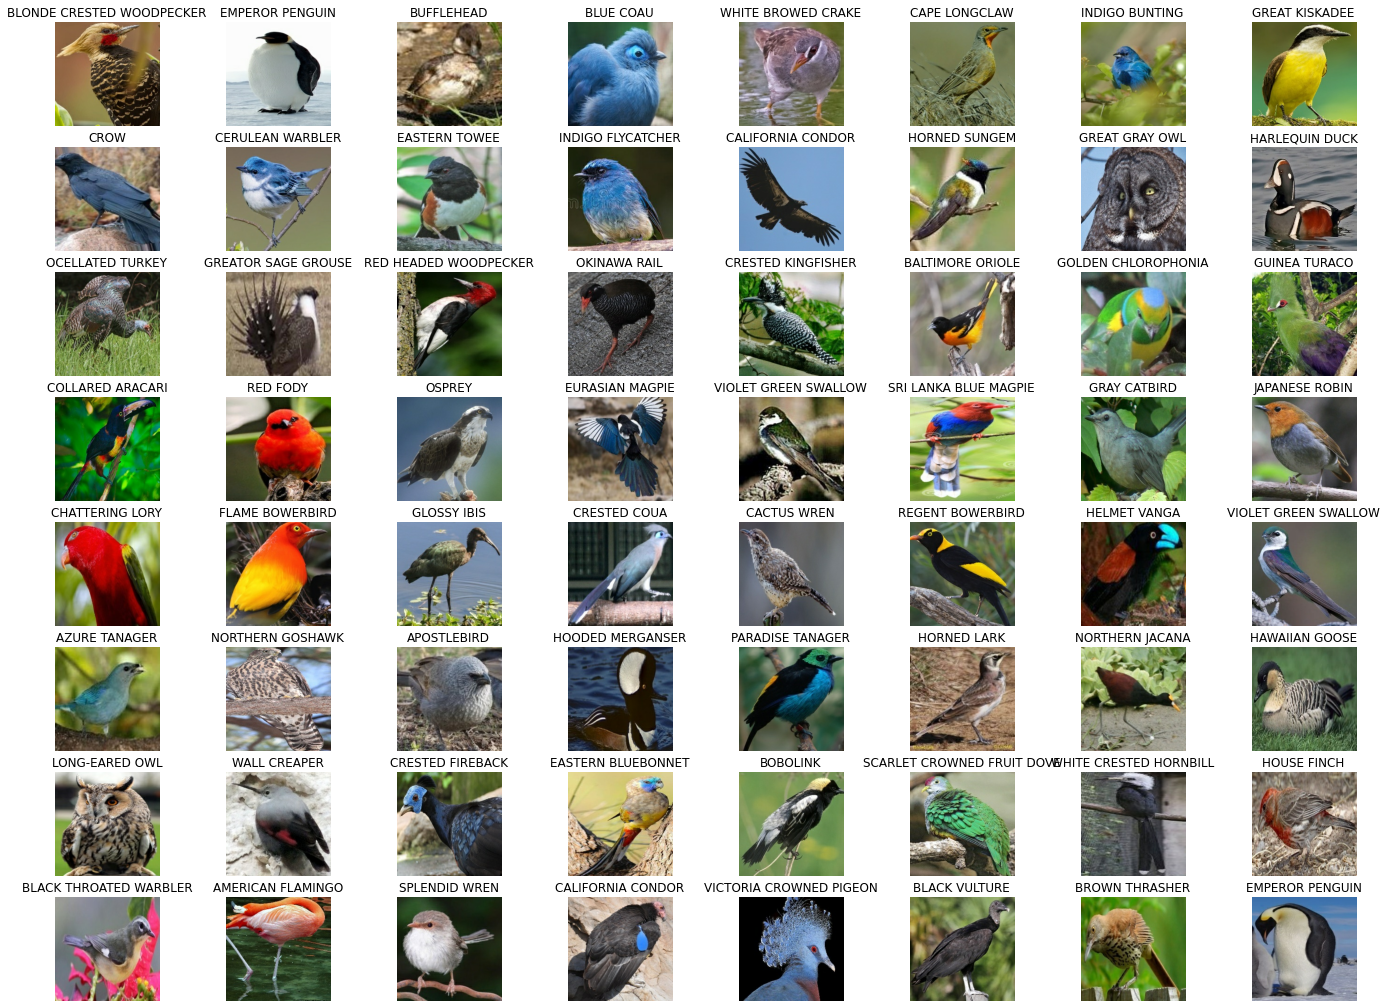

In [ ]:
visualize_dataset(train_ds)

## ANN Tarzı Model

In [ ]:
224*224*3

150528

In [ ]:
ann_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer((224, 224, 3)),
    tf.keras.layers.Rescaling(1/255.0),

    Flatten(),

    Dense(128, activation = "relu"),
    tf.keras.layers.Dropout(0.2),

    Dense(64, activation = "relu"),
    tf.keras.layers.Dropout(0.1),

    Dense(total_classes, activation = "softmax")
])

ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 128)               19267712  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 450)               2

In [ ]:
ann_model.compile(loss = "sparse_categorical_crossentropy",
                  optimizer = "adam",
                  metrics = ["acc"])

ann_model.fit(train_ds, epochs = 24, validation_data = valid_ds)

Epoch 1/24
1104/1104 [==============================] - 22s 17ms/step - loss: 6.2614 - acc: 0.0030 - val_loss: 6.1100 - val_acc: 0.0022
Epoch 2/24
1104/1104 [==============================] - 13s 12ms/step - loss: 6.1063 - acc: 0.0034 - val_loss: 6.1114 - val_acc: 0.0022
Epoch 3/24
1104/1104 [==============================] - 13s 12ms/step - loss: 6.1053 - acc: 0.0034 - val_loss: 6.1128 - val_acc: 0.0022
Epoch 4/24
1104/1104 [==============================] - 13s 12ms/step - loss: 6.1050 - acc: 0.0034 - val_loss: 6.1130 - val_acc: 0.0022
Epoch 5/24
1104/1104 [==============================] - 13s 12ms/step - loss: 6.1047 - acc: 0.0035 - val_loss: 6.1137 - val_acc: 0.0022
Epoch 6/24
1104/1104 [==============================] - 13s 12ms/step - loss: 6.1047 - acc: 0.0035 - val_loss: 6.1141 - val_acc: 0.0022
Epoch 7/24
1104/1104 [==============================] - 13s 12ms/step - loss: 6.1046 - acc: 0.0035 - val_loss: 6.1145 - val_acc: 0.0022
Epoch 8/24
1104/1104 [==========================

KeyboardInterrupt: ignored

In [ ]:
1/450

0.0022222222222222222

## Basit CNN

In [ ]:
224 224 16
# pooldan sonra 112 112 16

In [ ]:
basic_cnn = tf.keras.Sequential([
    tf.keras.layers.InputLayer((224, 224, 3)),
    tf.keras.layers.Rescaling(1/255.0),

    Conv2D(16, 3, padding = "same", activation = "relu"),
    MaxPooling2D((3, 3)),

    Conv2D(32, 3, padding = "same", activation = "relu"),
    MaxPooling2D((3, 3)),

    Conv2D(64, 3, padding = "same", activation = "relu"),
    MaxPooling2D((3, 3)),

    Conv2D(128, 3, padding = "same", activation = "relu"),
    MaxPooling2D((3, 3)),

    GlobalMaxPooling2D(),

    Dense(total_classes, activation = None)
])

basic_cnn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 74, 74, 32)        4640      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 24, 24, 64)       

In [ ]:
basic_cnn.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
                  optimizer = "adam",
                  metrics = ["acc"])

basic_cnn.fit(train_ds, epochs = 24, validation_data = valid_ds)

Epoch 1/24
1104/1104 [==============================] - 22s 18ms/step - loss: 4.7913 - acc: 0.1043 - val_loss: 3.1897 - val_acc: 0.3004
Epoch 2/24
1104/1104 [==============================] - 20s 18ms/step - loss: 3.0000 - acc: 0.3515 - val_loss: 2.3413 - val_acc: 0.4724
Epoch 3/24
1104/1104 [==============================] - 19s 18ms/step - loss: 2.3870 - acc: 0.4654 - val_loss: 1.9710 - val_acc: 0.5444
Epoch 4/24
1104/1104 [==============================] - 19s 18ms/step - loss: 2.0535 - acc: 0.5327 - val_loss: 1.7368 - val_acc: 0.5978
Epoch 5/24
1104/1104 [==============================] - 19s 18ms/step - loss: 1.8408 - acc: 0.5774 - val_loss: 1.5988 - val_acc: 0.6249
Epoch 6/24
1104/1104 [==============================] - 19s 18ms/step - loss: 1.6856 - acc: 0.6085 - val_loss: 1.5098 - val_acc: 0.6484
Epoch 7/24
1104/1104 [==============================] - 19s 18ms/step - loss: 1.5646 - acc: 0.6341 - val_loss: 1.4596 - val_acc: 0.6560
Epoch 8/24
1104/1104 [==========================

In [ ]:
basic_cnn.evaluate(test_ds)

36/36 [==============================] - 1s 20ms/step - loss: 1.5558 - acc: 0.6782


[1.555768370628357, 0.6782222390174866]

## Skip Connection CNN

In [ ]:
def conv_bn(inputs,
            filters = 16,
            kernel_size = (3, 3)):
    
    x = Conv2D(filters, kernel_size, padding = "same")(inputs)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.nn.silu(x) # swish

    return x

def skip_connection(inputs,
                    filters = 16,
                    kernel_size = (3, 3)):
    
    x = conv_bn(inputs, filters, kernel_size)
    x = conv_bn(x, filters, kernel_size)

    x = Concatenate()([x, inputs])
    
    return x
    
def downsampling_conv(inputs,
                      filters = 16,
                      kernel_size = (3, 3)):
    
    x = conv_bn(inputs, filters, kernel_size)
    x = conv_bn(x, filters, kernel_size)

    x = AveragePooling2D((3,3))(x)

    return x

In [ ]:
input_layer = tf.keras.Input((224, 224, 3))
rescaled_inputs = tf.keras.layers.Rescaling(1/255.0)(input_layer)

x = skip_connection(rescaled_inputs, filters = 16)
x = skip_connection(x, filters = 32)
x = downsampling_conv(x, filters = 32)

x = skip_connection(x, filters = 64)
x = skip_connection(x, filters = 64)
x = downsampling_conv(x, filters = 128)

x = GlobalAveragePooling2D()(x)
x = Dense(total_classes, activation = None)(x)

res_cnn = tf.keras.Model(input_layer, x)
res_cnn.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 224, 224, 16  448         ['rescaling[0][0]']              
                                )                                                                 
                                                                                              

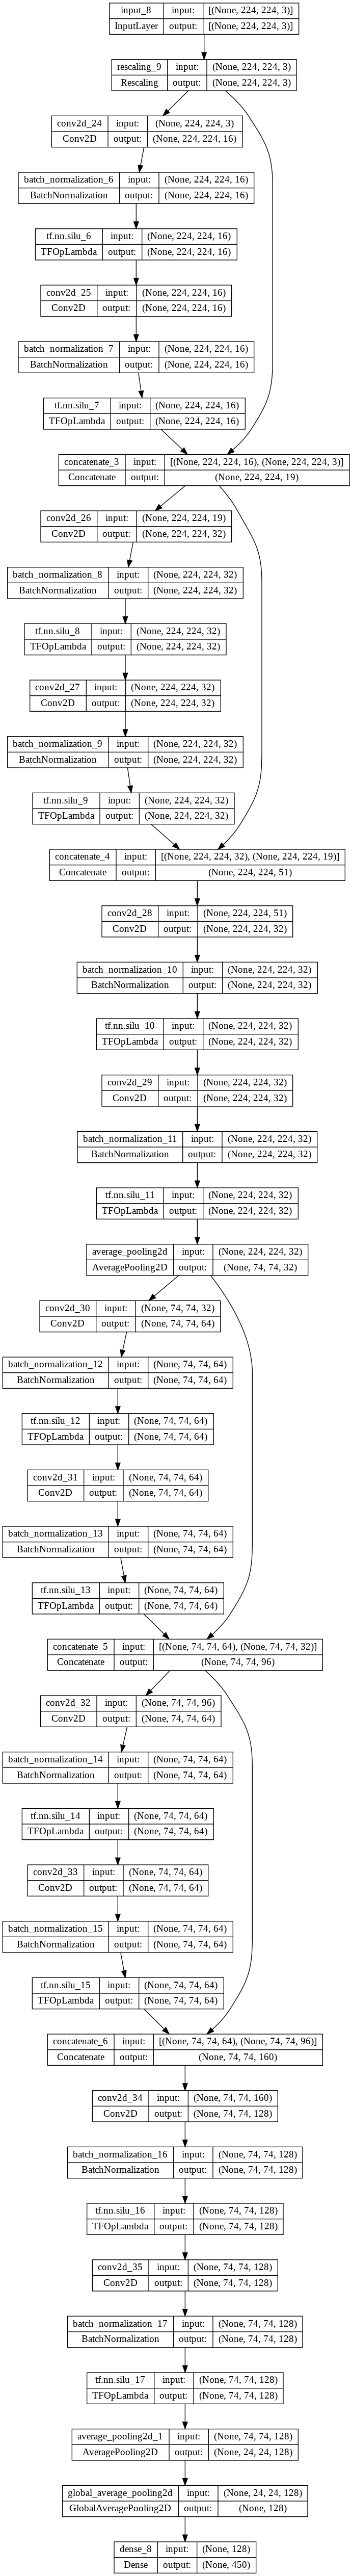

In [ ]:
tf.keras.utils.plot_model(res_cnn, show_shapes = True)

In [ ]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor = "val_loss",
    factor = 0.1,
    patience = 3,
    mode = "min",
    verbose = 1,
    min_lr = 1e-8
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor = "val_loss",
    patience = 7,
    mode = "min",
    verbose = 1,
    restore_best_weights = True
    )

callbacks = [reduce_lr, early_stopping]

res_cnn.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
                  optimizer = "adam",
                  metrics = ["acc"])

res_cnn.fit(train_ds, 
            epochs = 24,
            validation_data = valid_ds,
            callbacks = callbacks)

Epoch 1/24
552/552 [==============================] - 228s 397ms/step - loss: 5.1498 - acc: 0.0599 - val_loss: 4.3251 - val_acc: 0.1102 - lr: 0.0010
Epoch 2/24
552/552 [==============================] - 212s 384ms/step - loss: 4.0723 - acc: 0.1688 - val_loss: 3.5591 - val_acc: 0.2231 - lr: 0.0010
Epoch 3/24
552/552 [==============================] - 212s 384ms/step - loss: 3.3531 - acc: 0.2809 - val_loss: 2.9828 - val_acc: 0.3280 - lr: 0.0010
Epoch 4/24
552/552 [==============================] - 212s 384ms/step - loss: 2.7932 - acc: 0.3826 - val_loss: 2.6741 - val_acc: 0.3978 - lr: 0.0010
Epoch 5/24
552/552 [==============================] - 212s 384ms/step - loss: 2.3648 - acc: 0.4669 - val_loss: 2.2187 - val_acc: 0.4809 - lr: 0.0010
Epoch 6/24
552/552 [==============================] - 212s 384ms/step - loss: 2.0443 - acc: 0.5321 - val_loss: 1.9388 - val_acc: 0.5418 - lr: 0.0010
Epoch 7/24
552/552 [==============================] - 212s 384ms/step - loss: 1.8009 - acc: 0.5813 - val_l

## DenseNet121 Transfer Learning

In [7]:
from tensorflow.keras.applications.densenet import DenseNet121, preprocess_input

input_layer = tf.keras.Input((224, 224, 3))
preprocessed_inputs = tf.keras.layers.Lambda(lambda x: preprocess_input(x))(input_layer)

In [8]:
base_model = DenseNet121(
    weights = "imagenet",
    include_top = False,
    input_tensor = preprocessed_inputs
)
base_model

29084464/29084464 [==============================] - 2s 0us/step


In [9]:
base_model.output

<KerasTensor: shape=(None, 7, 7, 1024) dtype=float32 (created by layer 'relu')>

In [10]:
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(total_classes)(x)

tl_model = tf.keras.Model(inputs=input_layer, outputs=x)
tl_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda (Lambda)                (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['lambda[0][0]']                 
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']     

In [14]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor = "val_loss",
    factor = 0.1,
    patience = 3,
    mode = "min",
    verbose = 1,
    min_lr = 1e-8
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor = "val_loss",
    patience = 7,
    mode = "min",
    verbose = 1,
    restore_best_weights = True
    )

callbacks = [reduce_lr, early_stopping]

tl_model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
                  optimizer = "adam",
                  metrics = ["acc"])

tl_model.fit(train_ds, 
            epochs = 24,
            validation_data = valid_ds,
            callbacks = callbacks)

Epoch 1/24
552/552 [==============================] - 175s 274ms/step - loss: 1.2944 - acc: 0.7417 - val_loss: 0.6496 - val_acc: 0.8520 - lr: 0.0010
Epoch 2/24
552/552 [==============================] - 143s 258ms/step - loss: 0.3136 - acc: 0.9212 - val_loss: 0.3873 - val_acc: 0.9044 - lr: 0.0010
Epoch 3/24
552/552 [==============================] - 142s 258ms/step - loss: 0.1841 - acc: 0.9524 - val_loss: 0.4295 - val_acc: 0.8924 - lr: 0.0010
Epoch 4/24
552/552 [==============================] - 142s 258ms/step - loss: 0.1448 - acc: 0.9604 - val_loss: 0.4901 - val_acc: 0.8662 - lr: 0.0010
Epoch 5/24
552/552 [==============================] - 143s 258ms/step - loss: 0.1208 - acc: 0.9651 - val_loss: 0.3386 - val_acc: 0.9156 - lr: 0.0010
Epoch 6/24
552/552 [==============================] - 142s 258ms/step - loss: 0.1011 - acc: 0.9704 - val_loss: 0.3799 - val_acc: 0.9009 - lr: 0.0010
Epoch 7/24
552/552 [==============================] - 143s 258ms/step - loss: 0.0935 - acc: 0.9719 - val_l

In [15]:
tl_model.evaluate(test_ds)

18/18 [==============================] - 2s 92ms/step - loss: 0.0480 - acc: 0.9867


[0.048026978969573975, 0.9866666793823242]